In [1]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [2]:
data = pd.read_csv('221025_ustomer_join.csv')
data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date,lasting_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47.968131
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47.968131
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47.968131
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47.968131
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47.968131


__클러스터 사용__ : K-Means
- 군집 개수 : 4개
- mean, median, min, max 변수는 월 이용 회수와 관련된 변수임(1~8사이 값을 가짐)
- mem_period 단위가 너무 커서 scaling이 필요함.

In [3]:
useData = data[['mean', 'median', 'amax', 'lasting_period']]
useData.head()

,mean,median,amax,lasting_period
0,4.833333,5.0,8,47.968131
1,5.083333,5.0,7,47.968131
2,4.583333,5.0,6,47.968131
3,4.833333,4.5,7,47.968131
4,3.916667,4.0,6,47.968131


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
x_scaled = scaler.fit_transform(useData)
x_scaled = pd.DataFrame(x_scaled,
                        columns = ['mean', 'median', 'amax', 'mem_period'])
x_scaled.head()

,mean,median,amax,mem_period
0,-0.281206,-0.133676,0.081177,2.031859
1,-0.140545,-0.133676,-0.379928,2.031859
2,-0.421867,-0.133676,-0.841034,2.031859
3,-0.281206,-0.400393,-0.379928,2.031859
4,-0.796964,-0.667109,-0.841034,2.031859


In [5]:
kmeans = KMeans(n_clusters=4, random_state = 0)
useData.columns = ['월별 평균', '월별 중간값', '월별 최대값', '회원기간']
useData['cluster'] = kmeans.fit(x_scaled).labels_
useData.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10372\4159629863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useData['cluster'] = kmeans.fit(x_scaled).labels_


,월별 평균,월별 중간값,월별 최대값,회원기간,cluster
0,4.833333,5.0,8,47.968131,0
1,5.083333,5.0,7,47.968131,0
2,4.583333,5.0,6,47.968131,0
3,4.833333,4.5,7,47.968131,0
4,3.916667,4.0,6,47.968131,0


In [6]:
# cluster기준으로 데이터 개수 세기
useData.groupby('cluster').count()

,월별 평균,월별 중간값,월별 최대값,회원기간
cluster,,,,
0,1718,1718,1718,1718
1,1165,1165,1165,1165
2,510,510,510,510
3,799,799,799,799


In [7]:
# 군집별 특징 확인
useData.groupby('cluster').mean()

,월별 평균,월별 중간값,월별 최대값,회원기간
cluster,,,,
0,4.949446,4.944703,7.530850,34.293022
1,7.631280,7.616738,9.907296,10.209606
2,2.652166,2.597059,3.666667,10.939130
3,4.518491,4.152065,8.070088,7.750833


![image](https://user-images.githubusercontent.com/87592790/198237686-039c634b-9e19-4434-9e33-dec984c14281.png)

In [ ]:
### 차원 축소
- feature가 5개니까 2차원으로 줄여보자
- 차원축소에는 pca랑 tsne가 있다.

In [10]:
from sklearn.decomposition import PCA
x = x_scaled.copy()
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)
x_pca

array([[-0.60251887, -1.96349518],
       [-0.76532674, -1.9009774 ],
       [-1.17759653, -1.80769695],
       ...,
       [ 2.02747207,  0.98254079],
       [ 4.67777876,  0.45426219],
       [ 3.7948118 ,  0.63266421]])

In [12]:
pca_x = pd.DataFrame(x_pca)
pca_x['cluster'] = useData['cluster']
pca_x

,0,1,cluster
0,-0.602519,-1.963495,0
1,-0.765327,-1.900977,0
2,-1.177597,-1.807697,0
3,-1.000910,-1.859571,0
4,-1.704198,-1.718048,0
...,...,...,...
4187,2.027472,0.982541,1
4188,3.794343,0.630355,1
4189,2.027472,0.982541,1
4190,4.677779,0.454262,1


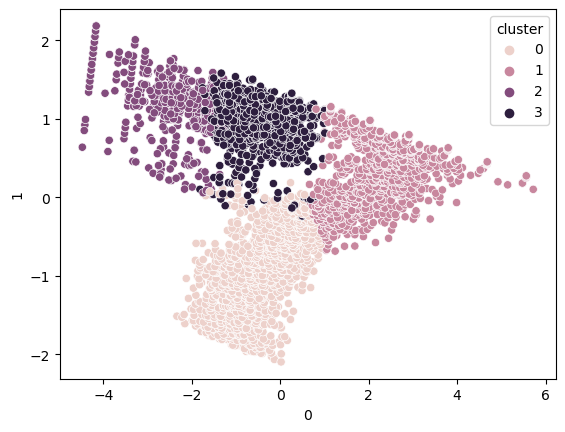

In [15]:
# 차원축소한 데이터 시각화
import matplotlib.pyplot as plt 
import seaborn as sns 

axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue = 'cluster', data = pca_x)

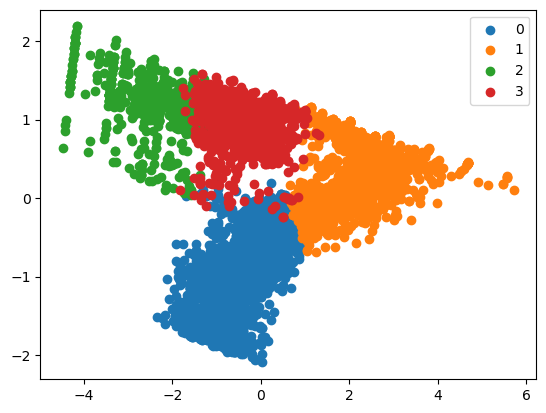

In [20]:
for i in sorted(pca_x['cluster'].unique()):
    # 해당하는 클러스터 번호일 때, 그림을 그리고
    # for문을 실행하면서 그려진 그림 위에 엇그림
    tmp = pca_x.loc[pca_x['cluster'] == i]
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_x['cluster'].unique()))
    
    # 클러스터가 잘 나눠져있는 것 같으니까 pca가 정보를 잘 보존한 채
    # 깔끔하게 데이터의 차원을 축소해줬다는 것을 알 수 있음
    # -> 차원축소가 잘되지 않았을 경우, 주성분의 개수가 적절하지 않을 경우,
    # 그래프의 데이터들이 겹쳐져서 그려짐

### 클러스터 별 회원 특징 파악 - 탈퇴, 정기이용 여부

In [21]:
useData_ = pd.concat([useData, data], axis=1)
useData_.head()

,월별 평균,월별 중간값,월별 최대값,회원기간,cluster,customer_id,name,class,gender,start_date,...,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date,lasting_period
0,4.833333,5.0,8,47.968131,0,OA832399,XXXX,C01,F,2015-05-01,...,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47.968131
1,5.083333,5.0,7,47.968131,0,PL270116,XXXXX,C01,M,2015-05-01,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47.968131
2,4.583333,5.0,6,47.968131,0,OA974876,XXXXX,C01,M,2015-05-01,...,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47.968131
3,4.833333,4.5,7,47.968131,0,HD024127,XXXXX,C01,F,2015-05-01,...,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47.968131
4,3.916667,4.0,6,47.968131,0,HD661448,XXXXX,C03,F,2015-05-01,...,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47.968131


In [23]:
# 탈퇴한 회원 groupby
newdf = useData_.groupby(['cluster', 'is_deleted'],
            as_index = False).count()[['cluster', 'is_deleted', 'customer_id']]

newdf

,cluster,is_deleted,customer_id
0,0,0,1700
1,0,1,18
2,1,0,1116
3,1,1,49
4,2,1,510
5,3,0,26
6,3,1,773


In [25]:
len(useData_[useData_['cluster'] == 2])

510

In [38]:
# 클러스터 및 탈퇴여부별 고객 비율 뽑기
d0 = (newdf['is_deleted'] == 0) # 스포츠 센터를 지속적으로 다니는 회원
d1 = (newdf['is_deleted'] == 1) # 탈퇴회원
d1

0    False
1     True
2    False
3     True
4     True
5    False
6     True
Name: is_deleted, dtype: bool

In [47]:
for i in range(0,4) :
    tmp = (newdf['cluster']==i)
#     print(tmp&d1)
    print('cluster'+str(i)+'의 탈퇴회원 비율은'+
          # 각각의 클러스터 0, 1, ... 에서 
          str(round((newdf.loc[(tmp&d1),'customer_id'].sum()/
                     newdf.loc[tmp, 'customer_id'].sum())*100, 2)) + '%')
    print('cluster'+str(i)+'의 유지회원 비율은'+
          str(round((newdf.loc[(tmp&d0),'customer_id'].sum() / 
                     newdf.loc[tmp,'customer_id'].sum())*100,2))+'%')
# 클러스터별 유지회원과 탈퇴회원의 비율을 비교할 수 있음

cluster0의 탈퇴회원 비율은1.05%
cluster0의 유지회원 비율은98.95%
cluster1의 탈퇴회원 비율은4.21%
cluster1의 유지회원 비율은95.79%
cluster2의 탈퇴회원 비율은100.0%
cluster2의 유지회원 비율은0.0%
cluster3의 탈퇴회원 비율은96.75%
cluster3의 유지회원 비율은3.25%


In [48]:

useData.groupby('cluster').mean()

,월별 평균,월별 중간값,월별 최대값,회원기간
cluster,,,,
0,4.949446,4.944703,7.530850,34.293022
1,7.631280,7.616738,9.907296,10.209606
2,2.652166,2.597059,3.666667,10.939130
3,4.518491,4.152065,8.070088,7.750833
